# The Race Around The Netherlands - 2018
Webscraping the leaderboard of 2018

There are 4 editions of the race. The leaderboard with the check-point timings can be found here:

2018: https://ratn2018.legendstracking.com/#

2019: https://ratn2019.legendstracking.com/# 

2020: https://ratn2020.legendstracking.com/#

2021: https://ratn2021.legendstracking.com/# AND/OR
https://www.dotwatcher.cc/race/race-around-the-netherlands-2020?reverse=true

The leaderboard (table) is in Javascript and I need to click a button for the table to become visible. 
Therefore you'll first need to click a button using Selenium, and - as I'm working in Chrome - the Chrome webdriver. 
After you've done so, you can use BeautifulSoup to extract the table.
- selenium: https://pypi.org/project/selenium/
- chrome webdriver: https://chromedriver.chromium.org/getting-started

In [8]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import regex as re
import datetime

In [12]:
#for scraping java
import selenium
from selenium import webdriver
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support.expected_conditions import presence_of_element_located
# import time
# import sys

## RATN 2018

In [13]:
url = 'https://ratn2018.legendstracking.com/#'

#set that you want to run the chrome headless (behind the scenes, in the background)
chrome_options = Options()
chrome_options.add_argument("--headless")

#insert absolute path of chrome driver
driver = webdriver.Chrome('C:/Users/jetsa/chromedriver.exe', options = chrome_options)
driver.get(url)

#### Click the right button
The buttons are placed here in the code:

-- nav tabs -->

li id="leaderboard-icon" class="active">

I search for the button using the tab-id: "leaderboard-icon"

In [14]:
# Find and click the right button, using the tab's id
button = driver.find_element(By.ID, "leaderboard-icon")
button.click()

<html>
 <head>
  <meta content="https://www.legendstracking.com/_lib/img/logo-facebook.png" property="og:image"/>
  <meta content="1200" property="og:image:width"/>
  <meta content="630" property="og:image:height"/>
  <meta content="Legends Tracking" property="og:title"/>
  <meta content="https://www.legendstracking.com" property="og:url"/>
  <meta content="Live gps tracking services for your event" property="og:description"/>
  <meta content="width=device-width, initial-scale=1.0, maximum-scale=1.0, user-scalable=no" name="viewport"/>
  <link href="../css/font-awesome.min.css" rel="stylesheet" type="text/css"/>
  <link href="../css/ol.css" rel="stylesheet" type="text/css"/>
  <link href="../css/trackers1.css" rel="stylesheet" type="text/css"/>
  <link href="../css/ol3-sidebar.css" rel="stylesheet" type="text/css"/>
  <link href="../css/ol3-layerswitcher.css" rel="stylesheet" type="text/css"/>
  <link href="../css/flags.css" rel="stylesheet" type="text/css"/>
  <link href="../dev/css/j
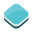

In [15]:
#From here on you can start using BS4. This will now also find the html-code of the table that became visible by clicking the button.
source = driver.page_source

#close the webdriver that runs in the background
driver.close()

soup = BeautifulSoup(source, 'html')
print(soup.prettify())

#### Find the right tables
There are 4 tables in the code.

- The first one contains nothing of interest

- The second one contains nothing of interest either

- The third one contains the headers (Start, Timing 1, Timing 2 etc) and timings of solo riders

- The fourth one contains the headers (Start, Timing 1, Timing 2 etc) and timings of rider-pairs

I'll start with the solo riders.

In [16]:
#pick the second table. This one contains information about the soloriders.
table_solo = soup.find_all('table')[2]
table_solo

<table><tbody><tr><td colspan="6"></td><td>Start</td><td>Timing 1</td><td>Timing 2</td><td>Timing 3</td><td>Timing 4</td><td>Timing 5</td><td>Timing 6</td><td>Timing 7</td><td>Timing 8</td><td>Timing 9</td><td>Finish</td></tr><tr><td>1)</td><td style="vertical-align:top">2</td><td style="vertical-align:top;"><div style="min-width:16px;"><img class="flag flag-be" src="../img/blank.gif"/></div></td><td style="vertical-align:top"><i aria-hidden="true" class="fa fa-mars fa-fw"></i></td><td>Cosyn</td><td>Joris</td><td><b>Tue 8:00</b></td><td><span id="leaderboard_8463_1">Tue 13:38</span></td><td><span id="leaderboard_8463_2"><b>Wed 1:17</b></span></td><td><span id="leaderboard_8463_3"><b>Wed 5:22</b></span></td><td><span id="leaderboard_8463_4"><b>Wed 10:22</b></span></td><td><span id="leaderboard_8463_5"><b>Wed 16:02</b></span></td><td><span id="leaderboard_8463_6"><b>Thu 6:28</b></span></td><td><span id="leaderboard_8463_7"><b>Thu 11:36</b></span></td><td><span id="leaderboard_8463_8"><b>

We have another challenge:
If you text.split().strip() the columns, there is no good character to do so. It becomes a horrible mess: double names ending up in timeslots etc.
Also, you cannot isolate the icon that displays the sex. 

Solutions: convert each table row into one long string. This way you can both grab the description of the icon (mars or venus) and split the columns on the closing td.  

In [17]:
rows_solo = table_solo.findChildren('tr')

#convert each element into a string to prevent a horrible mess
string_rows = []

for i in rows_solo:
    i = str(i)
    string_rows.append(i)
print(string_rows[7])

<tr><td>7)</td><td style="vertical-align:top">8</td><td style="vertical-align:top;"><div style="min-width:16px;"><img class="flag flag-nl" src="../img/blank.gif"/></div></td><td style="vertical-align:top"><i aria-hidden="true" class="fa fa-mars fa-fw"></i></td><td>Verhaar</td><td>Adam</td><td><b>Tue 8:00</b></td><td><span id="leaderboard_8469_1">Tue 14:05</span></td><td><span id="leaderboard_8469_2"><b>Wed 11:40</b></span></td><td><span id="leaderboard_8469_3"><b>Wed 14:23</b></span></td><td><span id="leaderboard_8469_4"><b>Wed 20:05</b></span></td><td><span id="leaderboard_8469_5"><b>Thu 11:25</b></span></td><td><span id="leaderboard_8469_6"><b>Thu 18:19</b></span></td><td><span id="leaderboard_8469_7"><b>Fri 8:58</b></span></td><td><span id="leaderboard_8469_8"><b>Sat 9:27</b></span></td><td><span id="leaderboard_8469_9"><b>Sat 20:47</b></span></td><td><span id="leaderboard_8469_10"><b>Sun 16:23</b></span></td></tr>


In [18]:
#convert the string+rows into a dataframe. Name the column "riders"
solo_riders = pd.DataFrame(string_rows)
solo_riders.columns=["riders"]
solo_riders.head()

,riders
0,"<tr><td colspan=""6""></td><td>Start</td><td>Tim..."
1,"<tr><td>1)</td><td style=""vertical-align:top"">..."
2,"<tr><td>2)</td><td style=""vertical-align:top"">..."
3,"<tr><td>3)</td><td style=""vertical-align:top"">..."
4,"<tr><td>4)</td><td style=""vertical-align:top"">..."


In [19]:
#split the strings on </td> 
solo_riders = solo_riders["riders"].str.split("</td>", expand = True)
solo_riders.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,"<tr><td colspan=""6"">",<td>Start,<td>Timing 1,<td>Timing 2,<td>Timing 3,<td>Timing 4,<td>Timing 5,<td>Timing 6,<td>Timing 7,<td>Timing 8,<td>Timing 9,<td>Finish,</tr>,None,None,None,None,None
1,<tr><td>1),"<td style=""vertical-align:top"">2","<td style=""vertical-align:top;""><div style=""mi...","<td style=""vertical-align:top""><i aria-hidden=...",<td>Cosyn,<td>Joris,<td><b>Tue 8:00</b>,"<td><span id=""leaderboard_8463_1"">Tue 13:38</s...","<td><span id=""leaderboard_8463_2""><b>Wed 1:17<...","<td><span id=""leaderboard_8463_3""><b>Wed 5:22<...","<td><span id=""leaderboard_8463_4""><b>Wed 10:22...","<td><span id=""leaderboard_8463_5""><b>Wed 16:02...","<td><span id=""leaderboard_8463_6""><b>Thu 6:28<...","<td><span id=""leaderboard_8463_7""><b>Thu 11:36...","<td><span id=""leaderboard_8463_8""><b>Fri 5:54<...","<td><span id=""leaderboard_8463_9""><b>Fri 19:20...","<td><span id=""leaderboard_8463_10""><b>Sat 14:2...",</tr>
2,<tr><td>2),"<td style=""vertical-align:top"">10","<td style=""vertical-align:top;""><div style=""mi...","<td style=""vertical-align:top""><i aria-hidden=...",<td>Bakker,<td>Tjerk,<td><b>Tue 8:00</b>,"<td><span id=""leaderboard_8471_1"">Tue 14:35</s...","<td><span id=""leaderboard_8471_2""><b>Wed 9:15<...","<td><span id=""leaderboard_8471_3""><b>Wed 13:17...","<td><span id=""leaderboard_8471_4""></span>","<td><span id=""leaderboard_8471_5""><b>Thu 7:01<...","<td><span id=""leaderboard_8471_6""><b>Thu 14:34...","<td><span id=""leaderboard_8471_7""><b>Thu 19:30...","<td><span id=""leaderboard_8471_8""><b>Fri 16:03...","<td><span id=""leaderboard_8471_9""><b>Sat 8:59<...","<td><span id=""leaderboard_8471_10""><b>Sat 18:4...",</tr>
3,<tr><td>3),"<td style=""vertical-align:top"">12","<td style=""vertical-align:top;""><div style=""mi...","<td style=""vertical-align:top""><i aria-hidden=...",<td>James,<td>Colin,<td><b>Tue 8:00</b>,"<td><span id=""leaderboard_8473_1"">Tue 14:08</s...","<td><span id=""leaderboard_8473_2""><b>Wed 8:32<...","<td><span id=""leaderboard_8473_3""><b>Wed 11:53...","<td><span id=""leaderboard_8473_4""><b>Wed 16:51...","<td><span id=""leaderboard_8473_5""><b>Thu 4:11<...","<td><span id=""leaderboard_8473_6""><b>Thu 12:32...","<td><span id=""leaderboard_8473_7""><b>Thu 17:34...","<td><span id=""leaderboard_8473_8""><b>Fri 12:10...","<td><span id=""leaderboard_8473_9""><b>Sat 7:54<...","<td><span id=""leaderboard_8473_10""><b>Sat 19:2...",</tr>
4,<tr><td>4),"<td style=""vertical-align:top"">6","<td style=""vertical-align:top;""><div style=""mi...","<td style=""vertical-align:top""><i aria-hidden=...",<td>Schreurs,<td>Jason,<td><b>Tue 8:00</b>,"<td><span id=""leaderboard_8467_1""><b>Tue 13:27...","<td><span id=""leaderboard_8467_2""><b>Wed 10:08...","<td><span id=""leaderboard_8467_3""><b>Wed 12:52...","<td><span id=""leaderboard_8467_4""><b>Wed 17:36...","<td><span id=""leaderboard_8467_5""><b>Thu 8:16<...","<td><span id=""leaderboard_8467_6""><b>Thu 14:51...","<td><span id=""leaderboard_8467_7""><b>Thu 19:30...","<td><span id=""leaderboard_8467_8""><b>Fri 16:35...","<td><span id=""leaderboard_8467_9""><b>Sat 11:05...","<td><span id=""leaderboard_8467_10""><b>Sat 21:3...",</tr>


In [20]:
# CUSTOMIZE drop useless columns: colnr 1; 2; 17
solo_riders.drop(solo_riders.columns[[1,2,17]], axis=1, inplace = True)
solo_riders.head()

,0,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,"<tr><td colspan=""6"">",<td>Timing 2,<td>Timing 3,<td>Timing 4,<td>Timing 5,<td>Timing 6,<td>Timing 7,<td>Timing 8,<td>Timing 9,<td>Finish,</tr>,None,None,None,None
1,<tr><td>1),"<td style=""vertical-align:top""><i aria-hidden=...",<td>Cosyn,<td>Joris,<td><b>Tue 8:00</b>,"<td><span id=""leaderboard_8463_1"">Tue 13:38</s...","<td><span id=""leaderboard_8463_2""><b>Wed 1:17<...","<td><span id=""leaderboard_8463_3""><b>Wed 5:22<...","<td><span id=""leaderboard_8463_4""><b>Wed 10:22...","<td><span id=""leaderboard_8463_5""><b>Wed 16:02...","<td><span id=""leaderboard_8463_6""><b>Thu 6:28<...","<td><span id=""leaderboard_8463_7""><b>Thu 11:36...","<td><span id=""leaderboard_8463_8""><b>Fri 5:54<...","<td><span id=""leaderboard_8463_9""><b>Fri 19:20...","<td><span id=""leaderboard_8463_10""><b>Sat 14:2..."
2,<tr><td>2),"<td style=""vertical-align:top""><i aria-hidden=...",<td>Bakker,<td>Tjerk,<td><b>Tue 8:00</b>,"<td><span id=""leaderboard_8471_1"">Tue 14:35</s...","<td><span id=""leaderboard_8471_2""><b>Wed 9:15<...","<td><span id=""leaderboard_8471_3""><b>Wed 13:17...","<td><span id=""leaderboard_8471_4""></span>","<td><span id=""leaderboard_8471_5""><b>Thu 7:01<...","<td><span id=""leaderboard_8471_6""><b>Thu 14:34...","<td><span id=""leaderboard_8471_7""><b>Thu 19:30...","<td><span id=""leaderboard_8471_8""><b>Fri 16:03...","<td><span id=""leaderboard_8471_9""><b>Sat 8:59<...","<td><span id=""leaderboard_8471_10""><b>Sat 18:4..."
3,<tr><td>3),"<td style=""vertical-align:top""><i aria-hidden=...",<td>James,<td>Colin,<td><b>Tue 8:00</b>,"<td><span id=""leaderboard_8473_1"">Tue 14:08</s...","<td><span id=""leaderboard_8473_2""><b>Wed 8:32<...","<td><span id=""leaderboard_8473_3""><b>Wed 11:53...","<td><span id=""leaderboard_8473_4""><b>Wed 16:51...","<td><span id=""leaderboard_8473_5""><b>Thu 4:11<...","<td><span id=""leaderboard_8473_6""><b>Thu 12:32...","<td><span id=""leaderboard_8473_7""><b>Thu 17:34...","<td><span id=""leaderboard_8473_8""><b>Fri 12:10...","<td><span id=""leaderboard_8473_9""><b>Sat 7:54<...","<td><span id=""leaderboard_8473_10""><b>Sat 19:2..."
4,<tr><td>4),"<td style=""vertical-align:top""><i aria-hidden=...",<td>Schreurs,<td>Jason,<td><b>Tue 8:00</b>,"<td><span id=""leaderboard_8467_1""><b>Tue 13:27...","<td><span id=""leaderboard_8467_2""><b>Wed 10:08...","<td><span id=""leaderboard_8467_3""><b>Wed 12:52...","<td><span id=""leaderboard_8467_4""><b>Wed 17:36...","<td><span id=""leaderboard_8467_5""><b>Thu 8:16<...","<td><span id=""leaderboard_8467_6""><b>Thu 14:51...","<td><span id=""leaderboard_8467_7""><b>Thu 19:30...","<td><span id=""leaderboard_8467_8""><b>Fri 16:35...","<td><span id=""leaderboard_8467_9""><b>Sat 11:05...","<td><span id=""leaderboard_8467_10""><b>Sat 21:3..."


In [21]:
#rename columns
solo_riders.columns=["Place", "MarsVenus","Lastname", "Firstname", "StartTiming", "Timing1", "Timing2", "Timing3", "Timing4","Timing5", "Timing6", "Timing7", "Timing8", "Timing9", "TimingFinish"]

In [22]:
#CUSTOMIZE drop useless rows 
solo_riders = solo_riders.drop([0, 16, 24]).reset_index()
solo_riders.head()

,index,Place,MarsVenus,Lastname,Firstname,StartTiming,Timing1,Timing2,Timing3,Timing4,Timing5,Timing6,Timing7,Timing8,Timing9,TimingFinish
0,1,<tr><td>1),"<td style=""vertical-align:top""><i aria-hidden=...",<td>Cosyn,<td>Joris,<td><b>Tue 8:00</b>,"<td><span id=""leaderboard_8463_1"">Tue 13:38</s...","<td><span id=""leaderboard_8463_2""><b>Wed 1:17<...","<td><span id=""leaderboard_8463_3""><b>Wed 5:22<...","<td><span id=""leaderboard_8463_4""><b>Wed 10:22...","<td><span id=""leaderboard_8463_5""><b>Wed 16:02...","<td><span id=""leaderboard_8463_6""><b>Thu 6:28<...","<td><span id=""leaderboard_8463_7""><b>Thu 11:36...","<td><span id=""leaderboard_8463_8""><b>Fri 5:54<...","<td><span id=""leaderboard_8463_9""><b>Fri 19:20...","<td><span id=""leaderboard_8463_10""><b>Sat 14:2..."
1,2,<tr><td>2),"<td style=""vertical-align:top""><i aria-hidden=...",<td>Bakker,<td>Tjerk,<td><b>Tue 8:00</b>,"<td><span id=""leaderboard_8471_1"">Tue 14:35</s...","<td><span id=""leaderboard_8471_2""><b>Wed 9:15<...","<td><span id=""leaderboard_8471_3""><b>Wed 13:17...","<td><span id=""leaderboard_8471_4""></span>","<td><span id=""leaderboard_8471_5""><b>Thu 7:01<...","<td><span id=""leaderboard_8471_6""><b>Thu 14:34...","<td><span id=""leaderboard_8471_7""><b>Thu 19:30...","<td><span id=""leaderboard_8471_8""><b>Fri 16:03...","<td><span id=""leaderboard_8471_9""><b>Sat 8:59<...","<td><span id=""leaderboard_8471_10""><b>Sat 18:4..."
2,3,<tr><td>3),"<td style=""vertical-align:top""><i aria-hidden=...",<td>James,<td>Colin,<td><b>Tue 8:00</b>,"<td><span id=""leaderboard_8473_1"">Tue 14:08</s...","<td><span id=""leaderboard_8473_2""><b>Wed 8:32<...","<td><span id=""leaderboard_8473_3""><b>Wed 11:53...","<td><span id=""leaderboard_8473_4""><b>Wed 16:51...","<td><span id=""leaderboard_8473_5""><b>Thu 4:11<...","<td><span id=""leaderboard_8473_6""><b>Thu 12:32...","<td><span id=""leaderboard_8473_7""><b>Thu 17:34...","<td><span id=""leaderboard_8473_8""><b>Fri 12:10...","<td><span id=""leaderboard_8473_9""><b>Sat 7:54<...","<td><span id=""leaderboard_8473_10""><b>Sat 19:2..."
3,4,<tr><td>4),"<td style=""vertical-align:top""><i aria-hidden=...",<td>Schreurs,<td>Jason,<td><b>Tue 8:00</b>,"<td><span id=""leaderboard_8467_1""><b>Tue 13:27...","<td><span id=""leaderboard_8467_2""><b>Wed 10:08...","<td><span id=""leaderboard_8467_3""><b>Wed 12:52...","<td><span id=""leaderboard_8467_4""><b>Wed 17:36...","<td><span id=""leaderboard_8467_5""><b>Thu 8:16<...","<td><span id=""leaderboard_8467_6""><b>Thu 14:51...","<td><span id=""leaderboard_8467_7""><b>Thu 19:30...","<td><span id=""leaderboard_8467_8""><b>Fri 16:35...","<td><span id=""leaderboard_8467_9""><b>Sat 11:05...","<td><span id=""leaderboard_8467_10""><b>Sat 21:3..."
4,5,<tr><td>5),"<td style=""vertical-align:top""><i aria-hidden=...",<td>Wallinga,<td>Erik,<td><b>Tue 8:00</b>,"<td><span id=""leaderboard_8468_1""><b>Tue 14:25...","<td><span id=""leaderboard_8468_2""><b>Wed 4:13<...","<td><span id=""leaderboard_8468_3""><b>Wed 7:50<...","<td><span id=""leaderboard_8468_4""><b>Wed 13:42...","<td><span id=""leaderboard_8468_5""><b>Wed 20:00...","<td><span id=""leaderboard_8468_6""><b>Thu 14:13...","<td><span id=""leaderboard_8468_7""><b>Thu 18:40...","<td><span id=""leaderboard_8468_8""><b>Fri 20:22...","<td><span id=""leaderboard_8468_9""><b>Sat 9:53<...","<td><span id=""leaderboard_8468_10""><b>Sat 22:3..."


#### Extract the gender of each rider from the icon information.

In [23]:
#extract the gender 
gender = []

for row in solo_riders["MarsVenus"]:
    if 'mars' in row:
        gender.append('male')
    if 'venus' in row:
        gender.append('female')

# Add gender as a column to the solo_riders dataframe and drop the MarsVenus column and the automatically created index-column
solo_riders["Gender"] = gender        
solo_riders = solo_riders.drop(solo_riders[["MarsVenus", "index"]], axis = 1)
solo_riders.head()

,Place,Lastname,Firstname,StartTiming,Timing1,Timing2,Timing3,Timing4,Timing5,Timing6,Timing7,Timing8,Timing9,TimingFinish,Gender
0,<tr><td>1),<td>Cosyn,<td>Joris,<td><b>Tue 8:00</b>,"<td><span id=""leaderboard_8463_1"">Tue 13:38</s...","<td><span id=""leaderboard_8463_2""><b>Wed 1:17<...","<td><span id=""leaderboard_8463_3""><b>Wed 5:22<...","<td><span id=""leaderboard_8463_4""><b>Wed 10:22...","<td><span id=""leaderboard_8463_5""><b>Wed 16:02...","<td><span id=""leaderboard_8463_6""><b>Thu 6:28<...","<td><span id=""leaderboard_8463_7""><b>Thu 11:36...","<td><span id=""leaderboard_8463_8""><b>Fri 5:54<...","<td><span id=""leaderboard_8463_9""><b>Fri 19:20...","<td><span id=""leaderboard_8463_10""><b>Sat 14:2...",male
1,<tr><td>2),<td>Bakker,<td>Tjerk,<td><b>Tue 8:00</b>,"<td><span id=""leaderboard_8471_1"">Tue 14:35</s...","<td><span id=""leaderboard_8471_2""><b>Wed 9:15<...","<td><span id=""leaderboard_8471_3""><b>Wed 13:17...","<td><span id=""leaderboard_8471_4""></span>","<td><span id=""leaderboard_8471_5""><b>Thu 7:01<...","<td><span id=""leaderboard_8471_6""><b>Thu 14:34...","<td><span id=""leaderboard_8471_7""><b>Thu 19:30...","<td><span id=""leaderboard_8471_8""><b>Fri 16:03...","<td><span id=""leaderboard_8471_9""><b>Sat 8:59<...","<td><span id=""leaderboard_8471_10""><b>Sat 18:4...",male
2,<tr><td>3),<td>James,<td>Colin,<td><b>Tue 8:00</b>,"<td><span id=""leaderboard_8473_1"">Tue 14:08</s...","<td><span id=""leaderboard_8473_2""><b>Wed 8:32<...","<td><span id=""leaderboard_8473_3""><b>Wed 11:53...","<td><span id=""leaderboard_8473_4""><b>Wed 16:51...","<td><span id=""leaderboard_8473_5""><b>Thu 4:11<...","<td><span id=""leaderboard_8473_6""><b>Thu 12:32...","<td><span id=""leaderboard_8473_7""><b>Thu 17:34...","<td><span id=""leaderboard_8473_8""><b>Fri 12:10...","<td><span id=""leaderboard_8473_9""><b>Sat 7:54<...","<td><span id=""leaderboard_8473_10""><b>Sat 19:2...",male
3,<tr><td>4),<td>Schreurs,<td>Jason,<td><b>Tue 8:00</b>,"<td><span id=""leaderboard_8467_1""><b>Tue 13:27...","<td><span id=""leaderboard_8467_2""><b>Wed 10:08...","<td><span id=""leaderboard_8467_3""><b>Wed 12:52...","<td><span id=""leaderboard_8467_4""><b>Wed 17:36...","<td><span id=""leaderboard_8467_5""><b>Thu 8:16<...","<td><span id=""leaderboard_8467_6""><b>Thu 14:51...","<td><span id=""leaderboard_8467_7""><b>Thu 19:30...","<td><span id=""leaderboard_8467_8""><b>Fri 16:35...","<td><span id=""leaderboard_8467_9""><b>Sat 11:05...","<td><span id=""leaderboard_8467_10""><b>Sat 21:3...",male
4,<tr><td>5),<td>Wallinga,<td>Erik,<td><b>Tue 8:00</b>,"<td><span id=""leaderboard_8468_1""><b>Tue 14:25...","<td><span id=""leaderboard_8468_2""><b>Wed 4:13<...","<td><span id=""leaderboard_8468_3""><b>Wed 7:50<...","<td><span id=""leaderboard_8468_4""><b>Wed 13:42...","<td><span id=""leaderboard_8468_5""><b>Wed 20:00...","<td><span id=""leaderboard_8468_6""><b>Thu 14:13...","<td><span id=""leaderboard_8468_7""><b>Thu 18:40...","<td><span id=""leaderboard_8468_8""><b>Fri 20:22...","<td><span id=""leaderboard_8468_9""><b>Sat 9:53<...","<td><span id=""leaderboard_8468_10""><b>Sat 22:3...",male


In [24]:
#CUSTOMIZE append columns with start date&time, and wether it's a solo or duo ride.
StartDate = datetime.datetime(2018, 5, 1, 8)
solo_riders.insert(0, 'Solo or Duo', 'Solo')
solo_riders.insert(0, 'StartDate', StartDate)

solo_riders.head()

,StartDate,Solo or Duo,Place,Lastname,Firstname,StartTiming,Timing1,Timing2,Timing3,Timing4,Timing5,Timing6,Timing7,Timing8,Timing9,TimingFinish,Gender
0,2018-05-01 08:00:00,Solo,<tr><td>1),<td>Cosyn,<td>Joris,<td><b>Tue 8:00</b>,"<td><span id=""leaderboard_8463_1"">Tue 13:38</s...","<td><span id=""leaderboard_8463_2""><b>Wed 1:17<...","<td><span id=""leaderboard_8463_3""><b>Wed 5:22<...","<td><span id=""leaderboard_8463_4""><b>Wed 10:22...","<td><span id=""leaderboard_8463_5""><b>Wed 16:02...","<td><span id=""leaderboard_8463_6""><b>Thu 6:28<...","<td><span id=""leaderboard_8463_7""><b>Thu 11:36...","<td><span id=""leaderboard_8463_8""><b>Fri 5:54<...","<td><span id=""leaderboard_8463_9""><b>Fri 19:20...","<td><span id=""leaderboard_8463_10""><b>Sat 14:2...",male
1,2018-05-01 08:00:00,Solo,<tr><td>2),<td>Bakker,<td>Tjerk,<td><b>Tue 8:00</b>,"<td><span id=""leaderboard_8471_1"">Tue 14:35</s...","<td><span id=""leaderboard_8471_2""><b>Wed 9:15<...","<td><span id=""leaderboard_8471_3""><b>Wed 13:17...","<td><span id=""leaderboard_8471_4""></span>","<td><span id=""leaderboard_8471_5""><b>Thu 7:01<...","<td><span id=""leaderboard_8471_6""><b>Thu 14:34...","<td><span id=""leaderboard_8471_7""><b>Thu 19:30...","<td><span id=""leaderboard_8471_8""><b>Fri 16:03...","<td><span id=""leaderboard_8471_9""><b>Sat 8:59<...","<td><span id=""leaderboard_8471_10""><b>Sat 18:4...",male
2,2018-05-01 08:00:00,Solo,<tr><td>3),<td>James,<td>Colin,<td><b>Tue 8:00</b>,"<td><span id=""leaderboard_8473_1"">Tue 14:08</s...","<td><span id=""leaderboard_8473_2""><b>Wed 8:32<...","<td><span id=""leaderboard_8473_3""><b>Wed 11:53...","<td><span id=""leaderboard_8473_4""><b>Wed 16:51...","<td><span id=""leaderboard_8473_5""><b>Thu 4:11<...","<td><span id=""leaderboard_8473_6""><b>Thu 12:32...","<td><span id=""leaderboard_8473_7""><b>Thu 17:34...","<td><span id=""leaderboard_8473_8""><b>Fri 12:10...","<td><span id=""leaderboard_8473_9""><b>Sat 7:54<...","<td><span id=""leaderboard_8473_10""><b>Sat 19:2...",male
3,2018-05-01 08:00:00,Solo,<tr><td>4),<td>Schreurs,<td>Jason,<td><b>Tue 8:00</b>,"<td><span id=""leaderboard_8467_1""><b>Tue 13:27...","<td><span id=""leaderboard_8467_2""><b>Wed 10:08...","<td><span id=""leaderboard_8467_3""><b>Wed 12:52...","<td><span id=""leaderboard_8467_4""><b>Wed 17:36...","<td><span id=""leaderboard_8467_5""><b>Thu 8:16<...","<td><span id=""leaderboard_8467_6""><b>Thu 14:51...","<td><span id=""leaderboard_8467_7""><b>Thu 19:30...","<td><span id=""leaderboard_8467_8""><b>Fri 16:35...","<td><span id=""leaderboard_8467_9""><b>Sat 11:05...","<td><span id=""leaderboard_8467_10""><b>Sat 21:3...",male
4,2018-05-01 08:00:00,Solo,<tr><td>5),<td>Wallinga,<td>Erik,<td><b>Tue 8:00</b>,"<td><span id=""leaderboard_8468_1""><b>Tue 14:25...","<td><span id=""leaderboard_8468_2""><b>Wed 4:13<...","<td><span id=""leaderboard_8468_3""><b>Wed 7:50<...","<td><span id=""leaderboard_8468_4""><b>Wed 13:42...","<td><span id=""leaderboard_8468_5""><b>Wed 20:00...","<td><span id=""leaderboard_8468_6""><b>Thu 14:13...","<td><span id=""leaderboard_8468_7""><b>Thu 18:40...","<td><span id=""leaderboard_8468_8""><b>Fri 20:22...","<td><span id=""leaderboard_8468_9""><b>Sat 9:53<...","<td><span id=""leaderboard_8468_10""><b>Sat 22:3...",male


##  Prepare the duo-table
Prepare the duo-table, so the cleaning can then be done at the same time

In [25]:
#grab the duo table
table_duo = soup.find_all('table')[3]
table_duo

<table><tbody><tr><td colspan="6"></td><td>Start</td><td>Timing 1</td><td>Timing 2</td><td>Timing 3</td><td>Timing 4</td><td>Timing 5</td><td>Timing 6</td><td>Timing 7</td><td>Timing 8</td><td>Timing 9</td><td>Finish</td></tr><tr><td>1)</td><td style="vertical-align:top">3</td><td style="vertical-align:top;"><div style="min-width:16px;"><img class="flag flag-nl" src="../img/blank.gif"/></div></td><td style="vertical-align:top"><i aria-hidden="true" class="fa fa-mars-double fa-fw"></i></td><td>Raboen - Raboen</td><td></td><td><b>Tue 8:00</b></td><td><span id="leaderboard_8491_1"><b>Tue 14:05</b></span></td><td><span id="leaderboard_8491_2"><b>Wed 8:43</b></span></td><td><span id="leaderboard_8491_3"><b>Wed 13:12</b></span></td><td><span id="leaderboard_8491_4"><b>Wed 20:36</b></span></td><td><span id="leaderboard_8491_5"><b>Thu 7:45</b></span></td><td><span id="leaderboard_8491_6"><b>Thu 19:34</b></span></td><td><span id="leaderboard_8491_7"><b>Fri 11:23</b></span></td><td><span id="lea

In [26]:
#grab the rows
rows_duo = table_duo.findChildren('tr')

#convert each elements into a string to prevent an even more horrible mess
string_rows = []

for i in rows_duo:
    i = str(i)
    string_rows.append(i)
print(string_rows[3])

<tr><td> </td><td style="vertical-align:top">2</td><td style="vertical-align:top;"><div style="min-width:16px;"><img class="flag flag-kr" src="../img/blank.gif"/></div></td><td style="vertical-align:top"><i aria-hidden="true" class="fa fa-venus-mars fa-fw"></i></td><td>Kim - Kim</td><td></td><td><b>Tue 8:00</b></td><td><span id="leaderboard_8488_1"><b>Wed 14:02</b></span></td><td><span id="leaderboard_8488_2"></span></td><td><span id="leaderboard_8488_3"></span></td><td><span id="leaderboard_8488_4"></span></td><td><span id="leaderboard_8488_5"></span></td><td><span id="leaderboard_8488_6"></span></td><td><span id="leaderboard_8488_7"></span></td><td><span id="leaderboard_8488_8"></span></td><td><span id="leaderboard_8488_9"></span></td><td><span id="leaderboard_8488_10"><b>Thu 17:36</b></span></td></tr>


In [27]:
#convert the string+rows into a dataframe. Name the column "riders"
duo_riders = pd.DataFrame(string_rows)
duo_riders.columns=["riders"]
duo_riders.head()

#split the strings on </td>
duo_riders = duo_riders["riders"].str.split("</td>", expand = True)
duo_riders.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,"<tr><td colspan=""6"">",<td>Start,<td>Timing 1,<td>Timing 2,<td>Timing 3,<td>Timing 4,<td>Timing 5,<td>Timing 6,<td>Timing 7,<td>Timing 8,<td>Timing 9,<td>Finish,</tr>,None,None,None,None,None
1,<tr><td>1),"<td style=""vertical-align:top"">3","<td style=""vertical-align:top;""><div style=""mi...","<td style=""vertical-align:top""><i aria-hidden=...",<td>Raboen - Raboen,<td>,<td><b>Tue 8:00</b>,"<td><span id=""leaderboard_8491_1""><b>Tue 14:05...","<td><span id=""leaderboard_8491_2""><b>Wed 8:43<...","<td><span id=""leaderboard_8491_3""><b>Wed 13:12...","<td><span id=""leaderboard_8491_4""><b>Wed 20:36...","<td><span id=""leaderboard_8491_5""><b>Thu 7:45<...","<td><span id=""leaderboard_8491_6""><b>Thu 19:34...","<td><span id=""leaderboard_8491_7""><b>Fri 11:23...","<td><span id=""leaderboard_8491_8""><b>Sat 11:27...","<td><span id=""leaderboard_8491_9""><b>Sun 8:53<...","<td><span id=""leaderboard_8491_10""><b>Mon 0:44...",</tr>
2,"<tr><td colspan=""8""><b>DNF</b>",</tr>,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
3,<tr><td>,"<td style=""vertical-align:top"">2","<td style=""vertical-align:top;""><div style=""mi...","<td style=""vertical-align:top""><i aria-hidden=...",<td>Kim - Kim,<td>,<td><b>Tue 8:00</b>,"<td><span id=""leaderboard_8488_1""><b>Wed 14:02...","<td><span id=""leaderboard_8488_2""></span>","<td><span id=""leaderboard_8488_3""></span>","<td><span id=""leaderboard_8488_4""></span>","<td><span id=""leaderboard_8488_5""></span>","<td><span id=""leaderboard_8488_6""></span>","<td><span id=""leaderboard_8488_7""></span>","<td><span id=""leaderboard_8488_8""></span>","<td><span id=""leaderboard_8488_9""></span>","<td><span id=""leaderboard_8488_10""><b>Thu 17:3...",</tr>
4,<tr><td>,"<td style=""vertical-align:top"">1","<td style=""vertical-align:top;""><div style=""mi...","<td style=""vertical-align:top""><i aria-hidden=...",<td>Lagerwerf - Meerwijk,<td>,<td><b>Tue 8:00</b>,"<td><span id=""leaderboard_8485_1""><b>Tue 16:08...","<td><span id=""leaderboard_8485_2""><b>Wed 13:52...","<td><span id=""leaderboard_8485_3""><b>Wed 17:30...","<td><span id=""leaderboard_8485_4""><b>Thu 10:58...","<td><span id=""leaderboard_8485_5""><b>Thu 17:22...","<td><span id=""leaderboard_8485_6""><b>Fri 15:19...","<td><span id=""leaderboard_8485_7""></span>","<td><span id=""leaderboard_8485_8""></span>","<td><span id=""leaderboard_8485_9""></span>","<td><span id=""leaderboard_8485_10""><b>Sat 12:4...",</tr>


In [28]:
# CUSTOMIZE drop useless columns: colnr 1; 2; 17
duo_riders = duo_riders.drop(duo_riders.columns[[1,2,17]], axis=1)
duo_riders

#rename columns
duo_riders.columns=["Place", "MarsVenus","Lastname", "Firstname", "StartTiming", "Timing1", "Timing2", "Timing3", "Timing4","Timing5", "Timing6", "Timing7", "Timing8", "Timing9", "TimingFinish"]

#check which rows are empty/useless and you should drop in the next cell. 
duo_riders.head()

,Place,MarsVenus,Lastname,Firstname,StartTiming,Timing1,Timing2,Timing3,Timing4,Timing5,Timing6,Timing7,Timing8,Timing9,TimingFinish
0,"<tr><td colspan=""6"">",<td>Timing 2,<td>Timing 3,<td>Timing 4,<td>Timing 5,<td>Timing 6,<td>Timing 7,<td>Timing 8,<td>Timing 9,<td>Finish,</tr>,None,None,None,None
1,<tr><td>1),"<td style=""vertical-align:top""><i aria-hidden=...",<td>Raboen - Raboen,<td>,<td><b>Tue 8:00</b>,"<td><span id=""leaderboard_8491_1""><b>Tue 14:05...","<td><span id=""leaderboard_8491_2""><b>Wed 8:43<...","<td><span id=""leaderboard_8491_3""><b>Wed 13:12...","<td><span id=""leaderboard_8491_4""><b>Wed 20:36...","<td><span id=""leaderboard_8491_5""><b>Thu 7:45<...","<td><span id=""leaderboard_8491_6""><b>Thu 19:34...","<td><span id=""leaderboard_8491_7""><b>Fri 11:23...","<td><span id=""leaderboard_8491_8""><b>Sat 11:27...","<td><span id=""leaderboard_8491_9""><b>Sun 8:53<...","<td><span id=""leaderboard_8491_10""><b>Mon 0:44..."
2,"<tr><td colspan=""8""><b>DNF</b>",None,None,None,None,None,None,None,None,None,None,None,None,None,None
3,<tr><td>,"<td style=""vertical-align:top""><i aria-hidden=...",<td>Kim - Kim,<td>,<td><b>Tue 8:00</b>,"<td><span id=""leaderboard_8488_1""><b>Wed 14:02...","<td><span id=""leaderboard_8488_2""></span>","<td><span id=""leaderboard_8488_3""></span>","<td><span id=""leaderboard_8488_4""></span>","<td><span id=""leaderboard_8488_5""></span>","<td><span id=""leaderboard_8488_6""></span>","<td><span id=""leaderboard_8488_7""></span>","<td><span id=""leaderboard_8488_8""></span>","<td><span id=""leaderboard_8488_9""></span>","<td><span id=""leaderboard_8488_10""><b>Thu 17:3..."
4,<tr><td>,"<td style=""vertical-align:top""><i aria-hidden=...",<td>Lagerwerf - Meerwijk,<td>,<td><b>Tue 8:00</b>,"<td><span id=""leaderboard_8485_1""><b>Tue 16:08...","<td><span id=""leaderboard_8485_2""><b>Wed 13:52...","<td><span id=""leaderboard_8485_3""><b>Wed 17:30...","<td><span id=""leaderboard_8485_4""><b>Thu 10:58...","<td><span id=""leaderboard_8485_5""><b>Thu 17:22...","<td><span id=""leaderboard_8485_6""><b>Fri 15:19...","<td><span id=""leaderboard_8485_7""></span>","<td><span id=""leaderboard_8485_8""></span>","<td><span id=""leaderboard_8485_9""></span>","<td><span id=""leaderboard_8485_10""><b>Sat 12:4..."


In [29]:
#CUSTOMIZE: drop useless ROWS 
duo_riders = duo_riders.drop([0, 2]).reset_index()
duo_riders.head()

,index,Place,MarsVenus,Lastname,Firstname,StartTiming,Timing1,Timing2,Timing3,Timing4,Timing5,Timing6,Timing7,Timing8,Timing9,TimingFinish
0,1,<tr><td>1),"<td style=""vertical-align:top""><i aria-hidden=...",<td>Raboen - Raboen,<td>,<td><b>Tue 8:00</b>,"<td><span id=""leaderboard_8491_1""><b>Tue 14:05...","<td><span id=""leaderboard_8491_2""><b>Wed 8:43<...","<td><span id=""leaderboard_8491_3""><b>Wed 13:12...","<td><span id=""leaderboard_8491_4""><b>Wed 20:36...","<td><span id=""leaderboard_8491_5""><b>Thu 7:45<...","<td><span id=""leaderboard_8491_6""><b>Thu 19:34...","<td><span id=""leaderboard_8491_7""><b>Fri 11:23...","<td><span id=""leaderboard_8491_8""><b>Sat 11:27...","<td><span id=""leaderboard_8491_9""><b>Sun 8:53<...","<td><span id=""leaderboard_8491_10""><b>Mon 0:44..."
1,3,<tr><td>,"<td style=""vertical-align:top""><i aria-hidden=...",<td>Kim - Kim,<td>,<td><b>Tue 8:00</b>,"<td><span id=""leaderboard_8488_1""><b>Wed 14:02...","<td><span id=""leaderboard_8488_2""></span>","<td><span id=""leaderboard_8488_3""></span>","<td><span id=""leaderboard_8488_4""></span>","<td><span id=""leaderboard_8488_5""></span>","<td><span id=""leaderboard_8488_6""></span>","<td><span id=""leaderboard_8488_7""></span>","<td><span id=""leaderboard_8488_8""></span>","<td><span id=""leaderboard_8488_9""></span>","<td><span id=""leaderboard_8488_10""><b>Thu 17:3..."
2,4,<tr><td>,"<td style=""vertical-align:top""><i aria-hidden=...",<td>Lagerwerf - Meerwijk,<td>,<td><b>Tue 8:00</b>,"<td><span id=""leaderboard_8485_1""><b>Tue 16:08...","<td><span id=""leaderboard_8485_2""><b>Wed 13:52...","<td><span id=""leaderboard_8485_3""><b>Wed 17:30...","<td><span id=""leaderboard_8485_4""><b>Thu 10:58...","<td><span id=""leaderboard_8485_5""><b>Thu 17:22...","<td><span id=""leaderboard_8485_6""><b>Fri 15:19...","<td><span id=""leaderboard_8485_7""></span>","<td><span id=""leaderboard_8485_8""></span>","<td><span id=""leaderboard_8485_9""></span>","<td><span id=""leaderboard_8485_10""><b>Sat 12:4..."


In [30]:
#extract the gender
gender = []

for row in duo_riders["MarsVenus"]:
    if 'mars-double' in row:
        gender.append('male')
    if 'venus-double' in row:
        gender.append('female')
    if 'venus-mars' in row:
        gender.append('mixed')

#Add gender as a column to the solo_riders dataframe and drop the MarsVenus column and the automatically created index-column
duo_riders["Gender"] = gender
duo_riders = duo_riders.drop(duo_riders[["MarsVenus", "index"]], axis = 1)
duo_riders.head()

,Place,Lastname,Firstname,StartTiming,Timing1,Timing2,Timing3,Timing4,Timing5,Timing6,Timing7,Timing8,Timing9,TimingFinish,Gender
0,<tr><td>1),<td>Raboen - Raboen,<td>,<td><b>Tue 8:00</b>,"<td><span id=""leaderboard_8491_1""><b>Tue 14:05...","<td><span id=""leaderboard_8491_2""><b>Wed 8:43<...","<td><span id=""leaderboard_8491_3""><b>Wed 13:12...","<td><span id=""leaderboard_8491_4""><b>Wed 20:36...","<td><span id=""leaderboard_8491_5""><b>Thu 7:45<...","<td><span id=""leaderboard_8491_6""><b>Thu 19:34...","<td><span id=""leaderboard_8491_7""><b>Fri 11:23...","<td><span id=""leaderboard_8491_8""><b>Sat 11:27...","<td><span id=""leaderboard_8491_9""><b>Sun 8:53<...","<td><span id=""leaderboard_8491_10""><b>Mon 0:44...",male
1,<tr><td>,<td>Kim - Kim,<td>,<td><b>Tue 8:00</b>,"<td><span id=""leaderboard_8488_1""><b>Wed 14:02...","<td><span id=""leaderboard_8488_2""></span>","<td><span id=""leaderboard_8488_3""></span>","<td><span id=""leaderboard_8488_4""></span>","<td><span id=""leaderboard_8488_5""></span>","<td><span id=""leaderboard_8488_6""></span>","<td><span id=""leaderboard_8488_7""></span>","<td><span id=""leaderboard_8488_8""></span>","<td><span id=""leaderboard_8488_9""></span>","<td><span id=""leaderboard_8488_10""><b>Thu 17:3...",mixed
2,<tr><td>,<td>Lagerwerf - Meerwijk,<td>,<td><b>Tue 8:00</b>,"<td><span id=""leaderboard_8485_1""><b>Tue 16:08...","<td><span id=""leaderboard_8485_2""><b>Wed 13:52...","<td><span id=""leaderboard_8485_3""><b>Wed 17:30...","<td><span id=""leaderboard_8485_4""><b>Thu 10:58...","<td><span id=""leaderboard_8485_5""><b>Thu 17:22...","<td><span id=""leaderboard_8485_6""><b>Fri 15:19...","<td><span id=""leaderboard_8485_7""></span>","<td><span id=""leaderboard_8485_8""></span>","<td><span id=""leaderboard_8485_9""></span>","<td><span id=""leaderboard_8485_10""><b>Sat 12:4...",male


In [31]:
#CUSTOMIZE append columns with the startdate (line 1) and whether it a duo or solo ride (line 2)
StartDate = datetime.datetime(2018, 5, 1, 8)
duo_riders.insert(0, 'Solo or Duo', 'Duo')
duo_riders.insert(0, 'StartDate', StartDate)
duo_riders.head()

,StartDate,Solo or Duo,Place,Lastname,Firstname,StartTiming,Timing1,Timing2,Timing3,Timing4,Timing5,Timing6,Timing7,Timing8,Timing9,TimingFinish,Gender
0,2018-05-01 08:00:00,Duo,<tr><td>1),<td>Raboen - Raboen,<td>,<td><b>Tue 8:00</b>,"<td><span id=""leaderboard_8491_1""><b>Tue 14:05...","<td><span id=""leaderboard_8491_2""><b>Wed 8:43<...","<td><span id=""leaderboard_8491_3""><b>Wed 13:12...","<td><span id=""leaderboard_8491_4""><b>Wed 20:36...","<td><span id=""leaderboard_8491_5""><b>Thu 7:45<...","<td><span id=""leaderboard_8491_6""><b>Thu 19:34...","<td><span id=""leaderboard_8491_7""><b>Fri 11:23...","<td><span id=""leaderboard_8491_8""><b>Sat 11:27...","<td><span id=""leaderboard_8491_9""><b>Sun 8:53<...","<td><span id=""leaderboard_8491_10""><b>Mon 0:44...",male
1,2018-05-01 08:00:00,Duo,<tr><td>,<td>Kim - Kim,<td>,<td><b>Tue 8:00</b>,"<td><span id=""leaderboard_8488_1""><b>Wed 14:02...","<td><span id=""leaderboard_8488_2""></span>","<td><span id=""leaderboard_8488_3""></span>","<td><span id=""leaderboard_8488_4""></span>","<td><span id=""leaderboard_8488_5""></span>","<td><span id=""leaderboard_8488_6""></span>","<td><span id=""leaderboard_8488_7""></span>","<td><span id=""leaderboard_8488_8""></span>","<td><span id=""leaderboard_8488_9""></span>","<td><span id=""leaderboard_8488_10""><b>Thu 17:3...",mixed
2,2018-05-01 08:00:00,Duo,<tr><td>,<td>Lagerwerf - Meerwijk,<td>,<td><b>Tue 8:00</b>,"<td><span id=""leaderboard_8485_1""><b>Tue 16:08...","<td><span id=""leaderboard_8485_2""><b>Wed 13:52...","<td><span id=""leaderboard_8485_3""><b>Wed 17:30...","<td><span id=""leaderboard_8485_4""><b>Thu 10:58...","<td><span id=""leaderboard_8485_5""><b>Thu 17:22...","<td><span id=""leaderboard_8485_6""><b>Fri 15:19...","<td><span id=""leaderboard_8485_7""></span>","<td><span id=""leaderboard_8485_8""></span>","<td><span id=""leaderboard_8485_9""></span>","<td><span id=""leaderboard_8485_10""><b>Sat 12:4...",male


### Appending the dataframes of solo and duo riders together

In [32]:
# glue solo and duo-riders together
#reset index as the indices overlap, a new column in created at index 0 - drop it.
all_riders = pd.concat([solo_riders, duo_riders]).reset_index()
all_riders = all_riders.drop(all_riders.columns[0], axis=1) 
pd.set_option('display.max_rows', all_riders.shape[0]+1) #to be able to see the whole dataframe (check if it went right)
all_riders

,StartDate,Solo or Duo,Place,Lastname,Firstname,StartTiming,Timing1,Timing2,Timing3,Timing4,Timing5,Timing6,Timing7,Timing8,Timing9,TimingFinish,Gender
0,2018-05-01 08:00:00,Solo,<tr><td>1),<td>Cosyn,<td>Joris,<td><b>Tue 8:00</b>,"<td><span id=""leaderboard_8463_1"">Tue 13:38</s...","<td><span id=""leaderboard_8463_2""><b>Wed 1:17<...","<td><span id=""leaderboard_8463_3""><b>Wed 5:22<...","<td><span id=""leaderboard_8463_4""><b>Wed 10:22...","<td><span id=""leaderboard_8463_5""><b>Wed 16:02...","<td><span id=""leaderboard_8463_6""><b>Thu 6:28<...","<td><span id=""leaderboard_8463_7""><b>Thu 11:36...","<td><span id=""leaderboard_8463_8""><b>Fri 5:54<...","<td><span id=""leaderboard_8463_9""><b>Fri 19:20...","<td><span id=""leaderboard_8463_10""><b>Sat 14:2...",male
1,2018-05-01 08:00:00,Solo,<tr><td>2),<td>Bakker,<td>Tjerk,<td><b>Tue 8:00</b>,"<td><span id=""leaderboard_8471_1"">Tue 14:35</s...","<td><span id=""leaderboard_8471_2""><b>Wed 9:15<...","<td><span id=""leaderboard_8471_3""><b>Wed 13:17...","<td><span id=""leaderboard_8471_4""></span>","<td><span id=""leaderboard_8471_5""><b>Thu 7:01<...","<td><span id=""leaderboard_8471_6""><b>Thu 14:34...","<td><span id=""leaderboard_8471_7""><b>Thu 19:30...","<td><span id=""leaderboard_8471_8""><b>Fri 16:03...","<td><span id=""leaderboard_8471_9""><b>Sat 8:59<...","<td><span id=""leaderboard_8471_10""><b>Sat 18:4...",male
2,2018-05-01 08:00:00,Solo,<tr><td>3),<td>James,<td>Colin,<td><b>Tue 8:00</b>,"<td><span id=""leaderboard_8473_1"">Tue 14:08</s...","<td><span id=""leaderboard_8473_2""><b>Wed 8:32<...","<td><span id=""leaderboard_8473_3""><b>Wed 11:53...","<td><span id=""leaderboard_8473_4""><b>Wed 16:51...","<td><span id=""leaderboard_8473_5""><b>Thu 4:11<...","<td><span id=""leaderboard_8473_6""><b>Thu 12:32...","<td><span id=""leaderboard_8473_7""><b>Thu 17:34...","<td><span id=""leaderboard_8473_8""><b>Fri 12:10...","<td><span id=""leaderboard_8473_9""><b>Sat 7:54<...","<td><span id=""leaderboard_8473_10""><b>Sat 19:2...",male
3,2018-05-01 08:00:00,Solo,<tr><td>4),<td>Schreurs,<td>Jason,<td><b>Tue 8:00</b>,"<td><span id=""leaderboard_8467_1""><b>Tue 13:27...","<td><span id=""leaderboard_8467_2""><b>Wed 10:08...","<td><span id=""leaderboard_8467_3""><b>Wed 12:52...","<td><span id=""leaderboard_8467_4""><b>Wed 17:36...","<td><span id=""leaderboard_8467_5""><b>Thu 8:16<...","<td><span id=""leaderboard_8467_6""><b>Thu 14:51...","<td><span id=""leaderboard_8467_7""><b>Thu 19:30...","<td><span id=""leaderboard_8467_8""><b>Fri 16:35...","<td><span id=""leaderboard_8467_9""><b>Sat 11:05...","<td><span id=""leaderboard_8467_10""><b>Sat 21:3...",male
4,2018-05-01 08:00:00,Solo,<tr><td>5),<td>Wallinga,<td>Erik,<td><b>Tue 8:00</b>,"<td><span id=""leaderboard_8468_1""><b>Tue 14:25...","<td><span id=""leaderboard_8468_2""><b>Wed 4:13<...","<td><span id=""leaderboard_8468_3""><b>Wed 7:50<...","<td><span id=""leaderboard_8468_4""><b>Wed 13:42...","<td><span id=""leaderboard_8468_5""><b>Wed 20:00...","<td><span id=""leaderboard_8468_6""><b>Thu 14:13...","<td><span id=""leaderboard_8468_7""><b>Thu 18:40...","<td><span id=""leaderboard_8468_8""><b>Fri 20:22...","<td><span id=""leaderboard_8468_9""><b>Sat 9:53<...","<td><span id=""leaderboard_8468_10""><b>Sat 22:3...",male
5,2018-05-01 08:00:00,Solo,<tr><td>6),<td>Cullen,<td>Ralph,<td><b>Tue 8:00</b>,"<td><span id=""leaderboard_8476_1"">Tue 14:04</s...","<td><span id=""leaderboard_8476_2""><b>Wed 6:54<...","<td><span id=""leaderboard_8476_3""></span>","<td><span id=""leaderboard_8476_4""><b>Wed 15:08...","<td><span id=""leaderboard_8476_5""><b>Wed 21:02...","<td><span id=""leaderboard_8476_6""><b>Thu 8:01<...","<td><span id=""leaderboard_8476_7""><b>Thu 21:44...","<td><span id=""leaderboard_8476_8""><b>Fri 15:58...","<td><span id=""leaderboard_8476_9""><b>Sat 12:03...","<td><span id=""leaderboard_8476_10""><b>Sun 6:34...",male
6,2018-05-01 08:00:00,Solo,<tr><td>7),<td>Verhaar,<td>Adam,<td><b>Tue 8:00</b>,"<td><span id=""leaderboard_8469_1"">Tue

### Cleaning - delete unwanted parts of the strings in each column  

In [33]:
#set of patterns you want to delete from the columns:
del_patterns = ['<td>', '\)', '<b>', '</b>', '<span id="leaderboard_[\d][\d][\d][\d][\d]*_[\d][\d]*">', '</span>', '<tr>', '</tr>', None]

In [35]:
all_riders = all_riders.replace(to_replace = del_patterns, value = '', regex = True)
all_riders

,StartDate,Solo or Duo,Place,Lastname,Firstname,StartTiming,Timing1,Timing2,Timing3,Timing4,Timing5,Timing6,Timing7,Timing8,Timing9,TimingFinish,Gender
0,2018-05-01 08:00:00,Solo,1,Cosyn,Joris,Tue 8:00,Tue 13:38,Wed 1:17,Wed 5:22,Wed 10:22,Wed 16:02,Thu 6:28,Thu 11:36,Fri 5:54,Fri 19:20,Sat 14:24,male
1,2018-05-01 08:00:00,Solo,2,Bakker,Tjerk,Tue 8:00,Tue 14:35,Wed 9:15,Wed 13:17,,Thu 7:01,Thu 14:34,Thu 19:30,Fri 16:03,Sat 8:59,Sat 18:48,male
2,2018-05-01 08:00:00,Solo,3,James,Colin,Tue 8:00,Tue 14:08,Wed 8:32,Wed 11:53,Wed 16:51,Thu 4:11,Thu 12:32,Thu 17:34,Fri 12:10,Sat 7:54,Sat 19:22,male
3,2018-05-01 08:00:00,Solo,4,Schreurs,Jason,Tue 8:00,Tue 13:27,Wed 10:08,Wed 12:52,Wed 17:36,Thu 8:16,Thu 14:51,Thu 19:30,Fri 16:35,Sat 11:05,Sat 21:30,male
4,2018-05-01 08:00:00,Solo,5,Wallinga,Erik,Tue 8:00,Tue 14:25,Wed 4:13,Wed 7:50,Wed 13:42,Wed 20:00,Thu 14:13,Thu 18:40,Fri 20:22,Sat 9:53,Sat 22:39,male
5,2018-05-01 08:00:00,Solo,6,Cullen,Ralph,Tue 8:00,Tue 14:04,Wed 6:54,,Wed 15:08,Wed 21:02,Thu 8:01,Thu 21:44,Fri 15:58,Sat 12:03,Sun 6:34,male
6,2018-05-01 08:00:00,Solo,7,Verhaar,Adam,Tue 8:00,Tue 14:05,Wed 11:40,Wed 14:23,Wed 20:05,Thu 11:25,Thu 18:19,Fri 8:58,Sat 9:27,Sat 20:47,Sun 16:23,male
7,2018-05-01 08:00:00,Solo,8,Holmes,James,Tue 8:00,Tue 14:34,Wed 12:39,Wed 16:10,Wed 21:40,Thu 12:40,Thu 21:58,Fri 11:19,Sat 12:51,Sun 7:42,Sun 21:03,male
8,2018-05-01 08:00:00,Solo,9,Robison,Jamie,Tue 8:00,Tue 15:15,Wed 17:50,Wed 21:43,Thu 9:12,Thu 16:17,Fri 11:34,Fri 17:16,Sat 18:05,Sun 16:47,Mon 12:13,male
9,2018-05-01 08:00:00,Solo,10,Zuidema,Onno,Tue 8:00,Tue 14:38,Wed 18:11,Thu 8:27,Thu 13:50,Fri 8:03,Fri 15:58,Fri 20:36,Sun 7:48,Sun 19:18,Mon 16:47,male


In [36]:
# add a column that tells you if the rider: finished on time (finisher); did not start (DNS) or did not finish (DNF)
# There are now white spaces when no place is assigned (DNS or DNF), and this overcomplicates stuff. Remove the white spaces.
all_riders['Place'] = all_riders['Place'].str.strip()

# create a list of the three conditions
conditions = [
    (all_riders["Place"] != ''), #finisher
    (all_riders["Place"] == '') & (all_riders['StartTiming'] != ''), #DNF
    (all_riders["Place"] == '') & (all_riders['StartTiming'] == '') #DNS
    ]

# create a list of the values we want to assign for each condition
values = ["Finisher", "DNF", "DNS"]

# create a new column and use np.select to assign values to it using our lists as arguments
all_riders['Status'] = np.select(conditions, values)

# display updated DataFrame
all_riders.head()

,StartDate,Solo or Duo,Place,Lastname,Firstname,StartTiming,Timing1,Timing2,Timing3,Timing4,Timing5,Timing6,Timing7,Timing8,Timing9,TimingFinish,Gender,Status
0,2018-05-01 08:00:00,Solo,1,Cosyn,Joris,Tue 8:00,Tue 13:38,Wed 1:17,Wed 5:22,Wed 10:22,Wed 16:02,Thu 6:28,Thu 11:36,Fri 5:54,Fri 19:20,Sat 14:24,male,Finisher
1,2018-05-01 08:00:00,Solo,2,Bakker,Tjerk,Tue 8:00,Tue 14:35,Wed 9:15,Wed 13:17,,Thu 7:01,Thu 14:34,Thu 19:30,Fri 16:03,Sat 8:59,Sat 18:48,male,Finisher
2,2018-05-01 08:00:00,Solo,3,James,Colin,Tue 8:00,Tue 14:08,Wed 8:32,Wed 11:53,Wed 16:51,Thu 4:11,Thu 12:32,Thu 17:34,Fri 12:10,Sat 7:54,Sat 19:22,male,Finisher
3,2018-05-01 08:00:00,Solo,4,Schreurs,Jason,Tue 8:00,Tue 13:27,Wed 10:08,Wed 12:52,Wed 17:36,Thu 8:16,Thu 14:51,Thu 19:30,Fri 16:35,Sat 11:05,Sat 21:30,male,Finisher
4,2018-05-01 08:00:00,Solo,5,Wallinga,Erik,Tue 8:00,Tue 14:25,Wed 4:13,Wed 7:50,Wed 13:42,Wed 20:00,Thu 14:13,Thu 18:40,Fri 20:22,Sat 9:53,Sat 22:39,male,Finisher


In [37]:
# for prettiness sake, change the order of the columns a bit (place, first name, last name, gender, all timings)
all_riders = all_riders[["Place", "Firstname", "Lastname", "Gender", "Solo or Duo" , "StartDate", "Status", "StartTiming", "Timing1", "Timing2", "Timing3", "Timing4","Timing5", "Timing6", "Timing7", "Timing8", "Timing9", "TimingFinish"]]
all_riders.head()

,Place,Firstname,Lastname,Gender,Solo or Duo,StartDate,Status,StartTiming,Timing1,Timing2,Timing3,Timing4,Timing5,Timing6,Timing7,Timing8,Timing9,TimingFinish
0,1,Joris,Cosyn,male,Solo,2018-05-01 08:00:00,Finisher,Tue 8:00,Tue 13:38,Wed 1:17,Wed 5:22,Wed 10:22,Wed 16:02,Thu 6:28,Thu 11:36,Fri 5:54,Fri 19:20,Sat 14:24
1,2,Tjerk,Bakker,male,Solo,2018-05-01 08:00:00,Finisher,Tue 8:00,Tue 14:35,Wed 9:15,Wed 13:17,,Thu 7:01,Thu 14:34,Thu 19:30,Fri 16:03,Sat 8:59,Sat 18:48
2,3,Colin,James,male,Solo,2018-05-01 08:00:00,Finisher,Tue 8:00,Tue 14:08,Wed 8:32,Wed 11:53,Wed 16:51,Thu 4:11,Thu 12:32,Thu 17:34,Fri 12:10,Sat 7:54,Sat 19:22
3,4,Jason,Schreurs,male,Solo,2018-05-01 08:00:00,Finisher,Tue 8:00,Tue 13:27,Wed 10:08,Wed 12:52,Wed 17:36,Thu 8:16,Thu 14:51,Thu 19:30,Fri 16:35,Sat 11:05,Sat 21:30
4,5,Erik,Wallinga,male,Solo,2018-05-01 08:00:00,Finisher,Tue 8:00,Tue 14:25,Wed 4:13,Wed 7:50,Wed 13:42,Wed 20:00,Thu 14:13,Thu 18:40,Fri 20:22,Sat 9:53,Sat 22:39


In [38]:
#CUSTOMIZE write to csv use the year in the name!
all_riders.to_csv('all_riders_2018.csv')